https://www.kaggle.com/c/quora-insincere-questions-classification/data

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from fastai import *
from fastai.text import *

In [ ]:
# path = Path('/Users/nikhil/workspace/fastaiv1/my_data/quora')

In [4]:
path = Path(Config.get_key('data_path')).expanduser()/'quora'
os.makedirs(path, exist_ok=True)
path

PosixPath('/home/jupyter/.fastai/data/quora')

In [ ]:
# ! /opt/anaconda3/bin/kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p {path}
# ! /opt/anaconda3/bin/kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p {path}
# ! unzip {path}/train.csv.zip -d {path}
# ! unzip {path}/test.csv.zip -d {path}
# ! chmod 775 -R {path}

In [ ]:
# df = pd.read_csv(path/'train.csv')

In [ ]:
# def label(row):
#     return 'positive' if row.target else 'negative'

# df['label'] = df.apply(lambda row: label(row), axis=1)
# df = df.rename(columns = {"question_text": "text"})
# df = df.drop(['qid', 'target'], axis=1)

In [ ]:
# import random
# # assign true value with probability of 0.8
# df['is_valid'] = df.apply(lambda x:0.8 > random.random(), axis=1)

#len(df) == len(df.qid.unique()) #1306122

In [ ]:
# df.to_csv(path/'texts.csv', index=False, columns=['label', 'text', 'is_valid'])

In [5]:
data_lm = TextLMDataBunch.from_csv(path, 'texts.csv', bs=50)

In [6]:
learn = language_model_learner(data_lm, drop_mult=0.3, pretrained_model=URLs.WT103)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7), wd=0.03)

In [ ]:
learn.save('fit_head')

In [7]:
learn.load('fit_head')

LanguageLearner(data=<fastai.text.data.TextLMDataBunch object at 0x7fe7cd7487b8>, model=SequentialRNN(
  (0): RNNCore(
    (encoder): Embedding(60002, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60002, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=60002, bias=True)
    (output_dp): RNNDropout()
  )
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=<function cross_entropy at 0x7fe754c6ebf8>, metrics=[<function accuracy at 0x7fe7541bbb70>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True,

In [8]:
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3, moms=(0.8,0.7), wd=0.03, pct_start=0.25)
learn.save('fit_head_1')

Total time: 2:42:53
epoch  train_loss  valid_loss  accuracy
1      3.123223    3.066694    0.474408  (1:21:17)
2      3.032192    3.020747    0.479958  (1:21:36)



In [9]:
learn.fit_one_cycle(2, 1e-3, moms=(0.8,0.7), wd=0.03, pct_start=0.25)
learn.save('fit_head_2')

Total time: 2:42:51
epoch  train_loss  valid_loss  accuracy
1      3.046038    3.014266    0.480501  (1:21:37)
2      2.976733    2.979129    0.484292  (1:21:13)



In [10]:
learn.fit_one_cycle(2, 1e-3, moms=(0.8,0.7), wd=0.03, pct_start=0.25)
learn.save('fit_head_3')

Total time: 2:41:49
epoch  train_loss  valid_loss  accuracy
1      2.998259    2.989681    0.483278  (1:21:09)
2      2.915966    2.959727    0.486523  (1:20:40)



In [11]:
learn.fit_one_cycle(2, 1e-3, moms=(0.8,0.7), wd=0.03, pct_start=0.25)
learn.save('fit_head_4')

Total time: 2:41:31
epoch  train_loss  valid_loss  accuracy
1      2.964180    2.978856    0.484347  (1:20:40)
2      2.887542    2.948990    0.487704  (1:20:50)



In [12]:
learn.fit_one_cycle(2, 1e-3, moms=(0.8,0.7), wd=0.03, pct_start=0.25)
learn.save('fit_head_5')

Total time: 2:42:34
epoch  train_loss  valid_loss  accuracy
1      2.932131    2.970285    0.484869  (1:21:13)
2      2.847831    2.942869    0.488274  (1:21:20)



In [13]:
learn.save('fine_tuned')

In [14]:
learn.save_encoder('fine_tuned_enc')

In [15]:
data_clas = TextClasDataBunch.from_csv(path, 'texts.csv', bs=50)

In [16]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


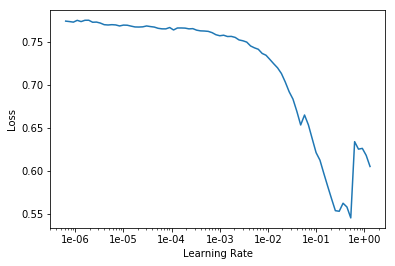

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

Total time: 34:27
epoch  train_loss  valid_loss  accuracy
1      0.176539    0.124643    0.950874  (34:27)



In [20]:
learn.save('first')
learn.load('first')

TextClassifierLearner(data=<fastai.text.data.TextClasDataBunch object at 0x7fe72cff19e8>, model=SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(60002, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60002, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [21]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/2.6,1e-2), moms=(0.8,0.7), pct_start=0.1)

Total time: 41:05
epoch  train_loss  valid_loss  accuracy
1      0.105682    0.115696    0.956302  (41:05)



In [22]:
learn.save('second')
learn.load('second')

TextClassifierLearner(data=<fastai.text.data.TextClasDataBunch object at 0x7fe72cff19e8>, model=SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(60002, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60002, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [23]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**2),5e-3), moms=(0.8,0.7), pct_start=0.1)

Total time: 1:05:35
epoch  train_loss  valid_loss  accuracy
1      0.119778    0.108855    0.956907  (1:05:35)



In [24]:
learn.save('third')
learn.load('third')

TextClassifierLearner(data=<fastai.text.data.TextClasDataBunch object at 0x7fe72cff19e8>, model=SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(60002, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60002, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [25]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7), pct_start=0.1)

Total time: 3:04:06
epoch  train_loss  valid_loss  accuracy
1      0.096201    0.104810    0.959633  (1:34:22)
2      0.105490    0.104736    0.960689  (1:29:44)



In [26]:
learn.save('fourth')

In [8]:
test_clas = TextClasDataBunch.from_csv(path, 'texts.csv', test='test.csv', bs=50)
learn = text_classifier_learner(test_clas, drop_mult=0.5)

In [15]:
test_clas.test_dl.dl.dataset.x

TextList (56370 items)
[Text xxbos xxfld 1 my voice range is xxup xxunk . my chest voice goes up to xxup f4 . included sample in my higher chest range . what is my voice type ?, Text xxbos xxfld 1 how much does a tutor earn in bangalore ?, Text xxbos xxfld 1 what are the best made pocket knives under $ 200 - 300 ?, Text xxbos xxfld 1 why would they add a hypothetical scenario that ’s impossible to happen in the link below ? it shows what 800 meters rise in sea level would look like ., Text xxbos xxfld 1 what is the dresscode for techmahindra freshers ?]...
Path: /home/jupyter/.fastai/data/quora

In [16]:
test_df = pd.read_csv(path/'test.csv')

In [22]:
test_df.question_text[1]

'How much does a tutor earn in Bangalore?'

In [23]:
learn.load('fourth')

RNNLearner(data=TextClasDataBunch;
Train: LabelList
y: CategoryList (1044897 items)
[Category negative, Category negative, Category negative, Category negative, Category positive]...
Path: /home/jupyter/.fastai/data/quora
x: TextList (1044897 items)
[Text xxbos xxfld 1 what are the deliverables expected from business consultations firms ?, Text xxbos xxfld 1 do some people choose to be unhappy ?, Text xxbos xxfld 1 what do i need to start becoming a animator & digital art designer ?, Text xxbos xxfld 1 have you ever known someone who had unbelievable genes ?, Text xxbos xxfld 1 why are southern slavic people darker skinned than slavic people of eastern european ?]...
Path: /home/jupyter/.fastai/data/quora;
Valid: LabelList
y: CategoryList (261225 items)
[Category negative, Category negative, Category negative, Category negative, Category negative]...
Path: /home/jupyter/.fastai/data/quora
x: TextList (261225 items)
[Text xxbos xxfld 1 how did quebec nationalists see their province as a

In [48]:
test_df['prediction'] = test_df.apply(lambda x: (1 if learn.predict(x['question_text'])=='positive' else 0), axis=1)

In [49]:
test_df.head()

,qid,question_text,prediction
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...,0
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?,0
2,000227734433360e1aae,What are the best made pocket knives under $20...,0
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...,0
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?,0


In [57]:
test_df.to_csv(path/'pred1_enc.csv', encoding='utf-8', index=False)
test_df.to_csv(path/'pred2.csv',  index=False)

In [64]:
test_df['prediction'] = test_df.apply(lambda x: learn.predict(x['question_text']), axis=1)

qid


AttributeError: 'str' object has no attribute 'question_text'

In [67]:
delet = (test_df[:10]).copy()

In [68]:
delet['prediction'] = delet.apply(lambda x: learn.predict(x['question_text']), axis=1)

In [104]:
count = 0
def predict(row):
    global count
    count += 1
    if count%100 == 0: print(count)
    return learn.predict(row['question_text'])

test_df['prediction'] = test_df.apply(predict, axis=1)

In [103]:
learn.predict('how can I fly wow')

('negative', tensor(0), tensor([1., 0.]))

In [105]:
test_df.to_csv(path/'c1_enc.csv', encoding='utf-8', index=False)
test_df.to_csv(path/'pred2.csv',  index=False)